# 1. Import Library

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


#Import Library 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [86]:
# Melakukan perulangan untuk import data
df = pd.read_csv('./data/dataset_3.csv')

# 3. Understanding Dataset

In [87]:
# Menampilkan 5 data teratas
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [88]:
# Menampilkan 5 data terbawah
df.tail()

,label,text
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...
193851,Ham,this is an automatically generated delivery st...


In [89]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [91]:
# Menampilkan statistik deskriptif dataset
df['label'].value_counts()

label
Ham     102160
Spam     91692
Name: count, dtype: int64

In [92]:
# Menampilkan panjang karakter email
df['text'] = df['text'].astype(str)
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...,403
1,Ham,got ice thought look az original message ice o...,530
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...,215
3,Spam,start increasing your odds of success & live s...,345
4,Ham,author jra date escapenumber escapenumber esca...,3097


# 4. Exploration Data Analysis (EDA)

### Data Cleaning

In [54]:
# Data Cleaning, Menghapus kolom yang tidak diperlukan untuk dataset phising
df = df.drop(columns=['Unnamed: 0'])

In [94]:
# Mengecek data yang kosong pada dataset
missing_values = df.isnull().sum()

# Menghapus data yang kosong pada kolom Email Text
df = df.dropna(subset=['text'])

In [95]:
# Melakukan cross check data yang kosong pada dataset
missing_values = df.isnull().sum()
print(missing_values)

label     0
text      0
length    0
dtype: int64


### Descriptive Statistics

In [96]:
# Menampilkan statistik deskriptif dataset
df['label'].value_counts()

label
Ham     102160
Spam     91692
Name: count, dtype: int64

In [97]:
# Menampilkan panjang karakter email
df['text'] = df['text'].astype(str)
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...,403
1,Ham,got ice thought look az original message ice o...,530
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...,215
3,Spam,start increasing your odds of success & live s...,345
4,Ham,author jra date escapenumber escapenumber esca...,3097


### Visualization

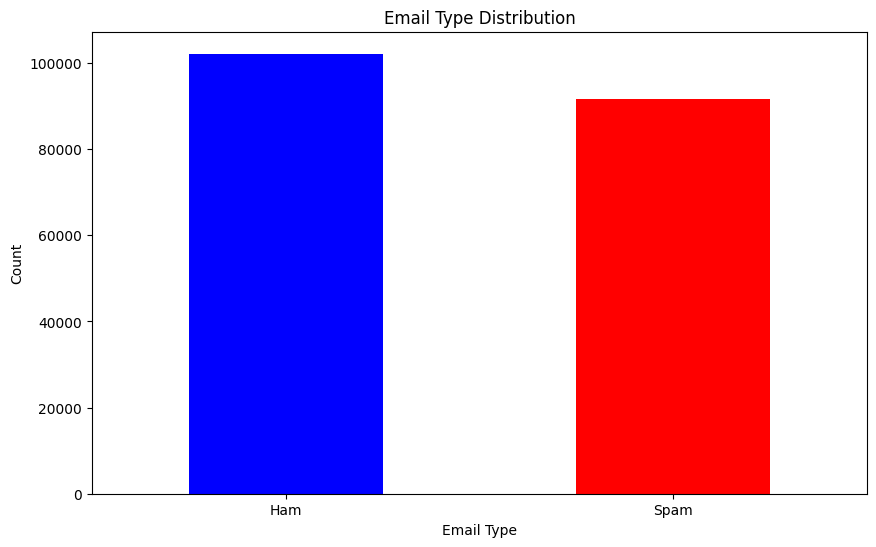

In [98]:
# Membuat variable email_type_distribution yang berisi jumlah email berdasarkan Email Type
email_type_distribution = df['label'].value_counts()

# Membuat plot jumlah email berdasarkan Email Type
plt.figure(figsize=(10, 6))
email_type_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Email Type Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Length of Text')

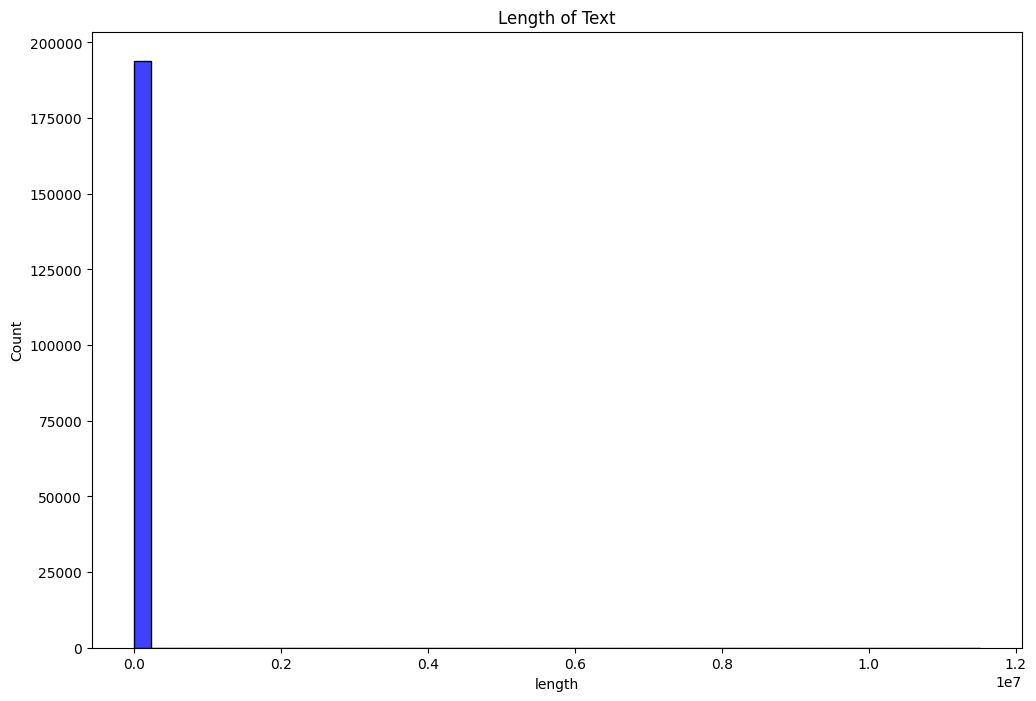

In [99]:
# Membuat plot panjang karakter email
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df,bins=50, color='blue')
plt.title('Length of Text')

array([<Axes: title={'center': 'Ham'}>, <Axes: title={'center': 'Spam'}>],
      dtype=object)

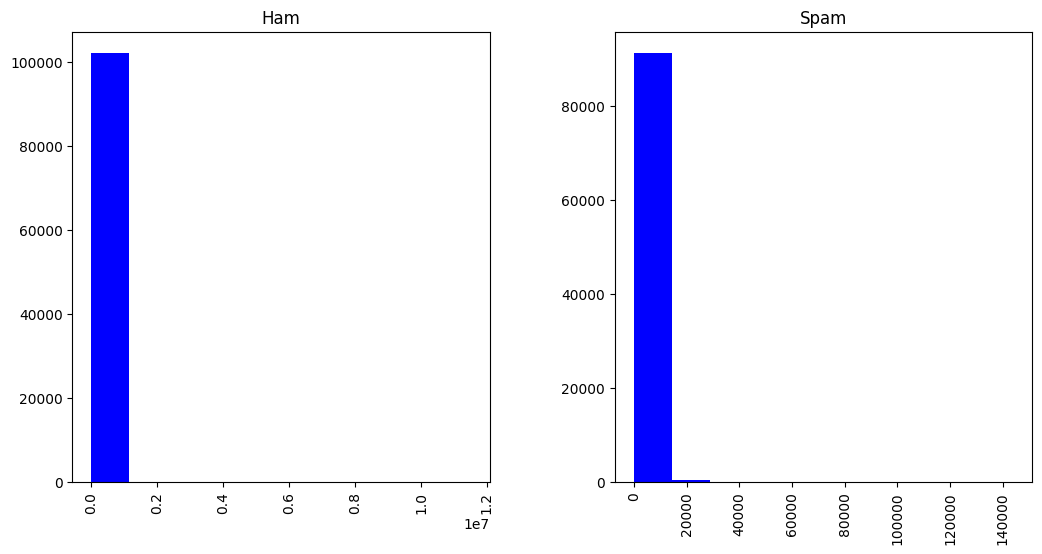

In [100]:
# Membuat plot panjang karakter email berdasarkan Email Type
df.hist(column='length',by='label', figsize=(12,6) , color='blue')

# 5. Preprocessing Data

### Preprocessing Function

In [101]:
# Mengaplikasikan fungsi preprocessing
df['text'] = df['text'].astype(str)

# Menghapus karakter khusus
df = df[df['text'].apply(lambda x: isinstance(x, str))]

### Tokenization

In [102]:
# Melakukan tokenisasi pada email text
df['Tokenized Text'] = df['text'].apply(word_tokenize)

# Print the tokenized texts
print(df['Tokenized Text'])

0         [viiiiiiagraaaa, only, for, the, ones, that, w...
1         [got, ice, thought, look, az, original, messag...
2         [yo, ur, wom, an, ne, eds, an, escapenumber, i...
3         [start, increasing, your, odds, of, success, &...
4         [author, jra, date, escapenumber, escapenumber...
                                ...                        
193847    [on, escapenumber, escapenumber, escapenumber,...
193848    [we, have, everything, you, need, escapelong, ...
193849    [hi, quick, question, say, i, have, a, date, v...
193850    [thank, you, for, your, loan, request, which, ...
193851    [this, is, an, automatically, generated, deliv...
Name: Tokenized Text, Length: 193852, dtype: object


### Stopwords Removal


In [103]:
# Menghapus stopwords dari tokenized text
df['Tokenized Text'] = df['Tokenized Text'].apply(lambda x: [word for word in x if word.lower() not in stopwords.words('english')])

# Melakukan print tokenized text
print(df['Tokenized Text'])

KeyboardInterrupt: 

### Stemming

In [66]:
# Menginisialisasi PorterStemmer
stemmer = PorterStemmer()

# Melakukan stemming pada Tokenized Text column di df_cleaned
df['Tokenized Text'] = df['Tokenized Text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Melakukan print dari Tokenized Text column
print(df['Tokenized Text'])

0        [:, 6, ., 1100, ,, disc, :, uniformitarian, ,,...
1        [side, *, galicismo, *, *, galicismo, *, spani...
2        [:, equistar, deal, ticket, still, avail, assi...
3        [hello, hot, lil, horni, toy, ., one, dream, ,...
4        [softwar, incred, low, price, (, 86, %, lower,...
                               ...                        
18645    [date, lone, housewif, alway, want, date, lone...
18646    [request, submit, :, access, request, anita, ....
18647    [:, import, -, prc, mtg, hi, dorn, &, john, ,,...
18648    [press, clip, -, letter, californian, util, pl...
18649                                              [empti]
Name: Tokenized Text, Length: 18650, dtype: object


In [69]:
# Menggabungkan semua hasil preprocessing
df['Processed Text'] = df['Tokenized Text'].apply(lambda x: ' '.join(x))

### Transformation


In [70]:
# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transform pada tfidf_matrix
tfidf_matrix = vectorizer.fit_transform(df['Processed Text'])

# Mencetak ukuran tfidf_matrix
print(tfidf_matrix.shape)

(18650, 141430)


# 6. Data Mining

### Imbalance Handling using Undersampling for Phising Dataset

In [71]:
# Menggunakan undersampling untuk mengatasi dataset yang tidak seimbang
df_phishing = df[df['Email Type'] == 'Safe Email']
df_non_phishing = df[df['Email Type'] == 'Phishing Email']

# Melakukan undersampling pada dataset
df_phishing = df_phishing.sample(df_non_phishing.shape[0])

In [72]:
# Mengecek kembali shape dari dataset
print(df_phishing.shape)
print(df_non_phishing.shape)

(7328, 5)
(7328, 5)


In [73]:
# Membuat dataset baru dari hasil undersampling yang telah dilakukan
df_balanced = pd.concat([df_phishing, df_non_phishing], ignore_index=True)
df_balanced.head()

,Email Text,Email Type,length,Tokenized Text,Processed Text
0,revised buyback the marathon - ashland deal ha...,Safe Email,66,"[revis, buyback, marathon, -, ashland, deal, a...",revis buyback marathon - ashland deal ad . juli
1,Justin Mason writes:\n>So IMO it's the corrupt...,Safe Email,511,"[justin, mason, write, :, >, imo, 's, corrupt,...",justin mason write : > imo 's corrupt 's probl...
2,I know this is simple but do you have /usr/src...,Safe Email,2203,"[know, simpl, /usr/src/linux, /usr/src/linux-2...",know simpl /usr/src/linux /usr/src/linux-2.4 s...
3,"Marc,The likelyhood of EFF or other mailing li...",Safe Email,1860,"[marc, ,, likelyhood, eff, mail, list, get, fi...","marc , likelyhood eff mail list get filter dec..."
4,"restricted stock louise , i never thanked you ...",Safe Email,237,"[restrict, stock, louis, ,, never, thank, look...","restrict stock louis , never thank look intere..."


### Model Training

In [75]:
# Mendefinisikan variabel X dan y
X = df['Processed Text']
y = df['Email Type']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Menginisialisasi TfidfVectorizer di luar perulangan
vectorizer = TfidfVectorizer()

# Melakukan fit dan transform pada training set
X_train_tfidf = vectorizer.fit_transform(X_train)

# Melakukan transform pada testing set
X_test_tfidf = vectorizer.transform(X_test)

# Menginisialisasi TruncatedSVD untuk GaussianNB
svd = TruncatedSVD(n_components=100)

# Transform data untuk GaussianNB
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Menggunakan perulangan untuk mencoba beberapa model
models = [SVC(kernel='linear'), DecisionTreeClassifier(), GaussianNB(), MLPClassifier(max_iter=300)]

# Membuat list untuk menyimpan hasil akurasi dari model
accuracies = []

# Melakukan perulangan untuk mencoba model
for model in models:
    if isinstance(model, GaussianNB):
        # Melatih model GaussianNB dengan data yang telah ditransformasi
        model.fit(X_train_svd, y_train)
        y_pred = model.predict(X_test_svd)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    
    # Menambahkan hasil akurasi ke dalam list
    accuracies.append(accuracy)

# Membuat dataframe dari hasil akurasi
results = pd.DataFrame({
    'Model': ['SVC', 'Decision Tree', 'Naive Bayes', 'Neural Network'],
    'Accuracy': accuracies
})

# Mencetak hasil akurasi
print(results)

            Model  Accuracy
0             SVC  0.976279
1   Decision Tree  0.910642
2     Naive Bayes  0.744923
3  Neural Network  0.976442


In [76]:
# Konversi akurasi model ke format csv
results.to_csv('accuracy_dataset_2.csv', index=False)

### Mencetak Classification Report dari Semua Metode

In [77]:
# Mencetak classification report dari masing masing model
for model in models:
    if isinstance(model, GaussianNB):
        model.fit(X_train_svd, y_train)
        y_pred = model.predict(X_test_svd)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    print(f'Classification Report for {model}')
    print(classification_report(y_test, y_pred))
    print('\n')

Classification Report for SVC(kernel='linear')
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.98      6155
  weighted avg       0.98      0.98      0.98      6155



Classification Report for DecisionTreeClassifier()
                precision    recall  f1-score   support

Phishing Email       0.88      0.90      0.89      2428
    Safe Email       0.93      0.92      0.93      3727

      accuracy                           0.91      6155
     macro avg       0.91      0.91      0.91      6155
  weighted avg       0.91      0.91      0.91      6155



Classification Report for GaussianNB()
                precision    recall  f1-score   support

Phishing Email       0.76      0.51      0.61      2428
    Safe Email       0.74      0.90      0.81      3727

      accur

### Convert hasil Classification Report ke Format CSV

In [78]:
# Menyimpan classification report dari masing masing model menjadi satu csv
with open('classification_report_dataset_2.csv', 'w') as f:
    for model in models:
        if isinstance(model, GaussianNB):
            model.fit(X_train_svd, y_train)
            y_pred = model.predict(X_test_svd)
        else:
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        report_df.to_csv(f, header=True)
        f.write('\n\n')

### (Support Vector Machine)

In [106]:
# Import model menggunakan pickle
import pickle

# Mengubah text menjadi vektor menggunakan TfidfVectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Melakukan fit model pada training set
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Menyimpan model ke dalam file
with open('./models/SVM_Model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

### (Decision Tree)

In [29]:
# Menginisialisasi Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Melakukan fit model pada training set
decision_tree_model.fit(X_train_tfidf, y_train)

# Membuat prediksi pada testing set
y_pred = decision_tree_model.predict(X_test_tfidf)

# Menyimpan model ke dalam file
with open('./models/DT_Model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

### (Naive Bayes)

In [30]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the Naive Bayes model
naive_bayes_model.fit(X_train_tfidf.toarray(), y_train)

# Make predictions using the Naive Bayes model
y_pred = naive_bayes_model.predict(X_test_tfidf.toarray())

# Save the Naive Bayes model
with open('./models/NB_Model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

### (Neural Network)

In [31]:
# Initialize the Neural Network model
neural_network_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=300)

# Fit the Neural Network model
neural_network_model.fit(X_train_tfidf, y_train)

# Make predictions using the Neural Network model
y_pred = neural_network_model.predict(X_test_tfidf)

# Save the Neural Network model
with open('./models/NN_Model.pkl', 'wb') as file:
    pickle.dump(neural_network_model, file)

# 7. Evaluasi Model

### (Support Vector Machine)

In [89]:
model_file = './models/SVM_Model.pkl'

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Support Vector Machine (SVM) Performance:')
print(f'Accuracy: {accuracy:.4f}')

Support Vector Machine (SVM) Performance:
Accuracy: 0.9763


In [34]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.98      6155
  weighted avg       0.98      0.98      0.98      6155

Confusion Matrix:
[[2386   42]
 [ 104 3623]]


### (Decision Tree)

In [35]:
model_file = "./models/DT_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Decision Tree Performance:')
print(f'Accuracy: {accuracy:.4f}')

Decision Tree Performance:
Accuracy: 0.9121


In [36]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.88      0.90      0.89      2428
    Safe Email       0.93      0.92      0.93      3727

      accuracy                           0.91      6155
     macro avg       0.91      0.91      0.91      6155
  weighted avg       0.91      0.91      0.91      6155

Confusion Matrix:
[[2185  243]
 [ 298 3429]]


### (Naive Bayes)

In [37]:
model_file = "./models/NB_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf.toarray())

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Naive Bayes Performance:')
print(f'Accuracy: {accuracy:.4f}')

Naive Bayes Performance:
Accuracy: 0.9069


In [38]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.89      0.87      0.88      2428
    Safe Email       0.92      0.93      0.92      3727

      accuracy                           0.91      6155
     macro avg       0.90      0.90      0.90      6155
  weighted avg       0.91      0.91      0.91      6155

Confusion Matrix:
[[2107  321]
 [ 252 3475]]


### (Neural Network)

In [39]:
model_file = "./models/NN_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Neural Network Performance:')
print(f'Accuracy: {accuracy:.4f}')

Neural Network Performance:
Accuracy: 0.9753


In [95]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.98      6155
  weighted avg       0.98      0.98      0.98      6155

Confusion Matrix:
[[2386   42]
 [ 104 3623]]


## Visualiasi Confusion Matrix, Classification Report, dan Akurasi

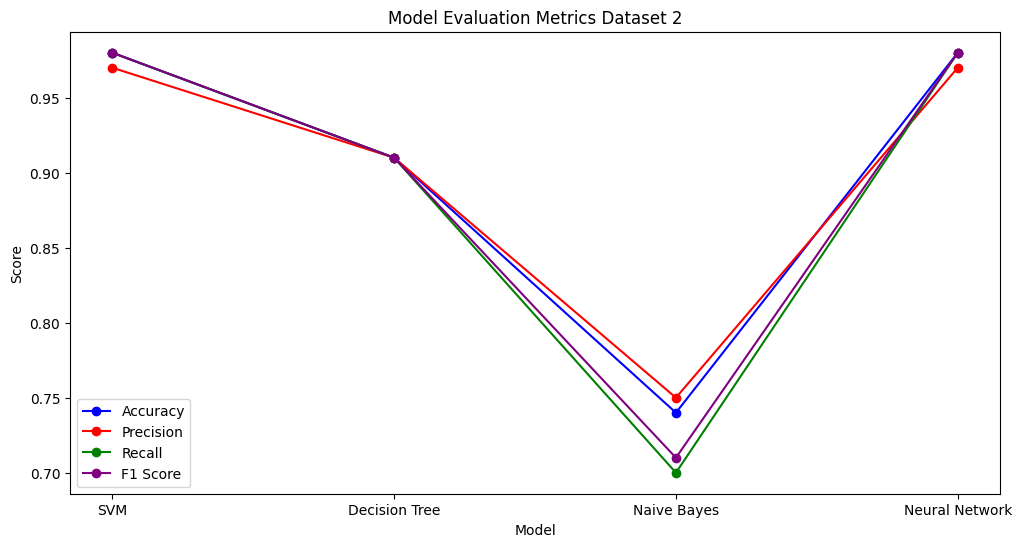

In [85]:
# Membuat visualisasi confusion matrix, classification report, dan akurasi semua model
models = ['SVM', 'Decision Tree', 'Naive Bayes', 'Neural Network']
accuracies = [0.98, 0.91, 0.74, 0.98]
precisions = [0.97, 0.91, 0.75, 0.97]
recalls = [0.98, 0.91, 0.70, 0.98]
f1_scores = [0.98, 0.91, 0.71, 0.98]

# Membuat dataframe dari hasil evaluasi model
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Membuat visualisasi confusion matrix, classification report, dan akurasi semua model
plt.figure(figsize=(12, 6))
plt.plot(results['Model'], results['Accuracy'], marker='o', label='Accuracy', color='blue')
plt.plot(results['Model'], results['Precision'], marker='o', label='Precision', color='red')
plt.plot(results['Model'], results['Recall'], marker='o', label='Recall', color='green')
plt.plot(results['Model'], results['F1 Score'], marker='o', label='F1 Score', color='purple')
plt.title('Model Evaluation Metrics Dataset 2')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.show()


## Perbandingan akurasi SVM, Decision Tree, Naive Bayes, dan Neural Network

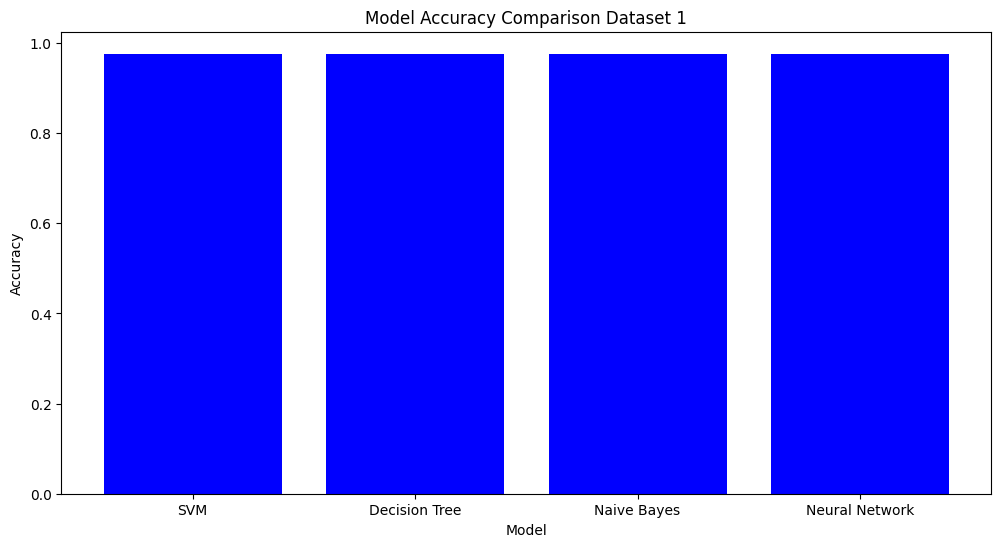

In [84]:
# Perbandingan akurasi semua model
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['Accuracy'], color='blue')
plt.title('Model Accuracy Comparison Dataset 1')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# 8. Prediksi

In [83]:
def predict_email(email_text):
    # Load the model
    with open(model_file, 'rb') as file:
        model = pickle.load(file)
    
    # Melakukan transform pada email text
    email_text_tfidf = vectorizer.transform([email_text])
    
    # Memprediksi email
    prediction = model.predict(email_text_tfidf)
    
    return prediction[0]

# Prediksi email
email_text = """
Subject: Project Deadline Extended

Hi Team,

Due to unforeseen circumstances, the project deadline has been extended by one week. Please adjust your schedules accordingly and continue to work diligently.

Best regards,
John Smith
Project Lead


"""

email_text2 = """
Subject: Action Required: Verify Your Account

Dear Customer,

We noticed some suspicious activity in your account. Please verify your identity by clicking the link below to avoid service interruption.

[Fake Verification Link]

Thank you for your cooperation.

Best Regards,
Customer Support

"""

prediction = predict_email(email_text)
print(f'The email is a {prediction}.')
prediction2 = predict_email(email_text2)
print(f'The email is a {prediction2}.')

The email is a Safe Email.
The email is a Phishing Email.
